In [437]:
# I manually edited the WPS Excel file. While storytelling, I might use the original one. This one (edited one) is for reading data more cleanly.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
wps = pd.read_excel("Datas/WPS_edited.xlsx")
print(wps.info())
print("---------------")
print(wps.isnull().any())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 17 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   2023 Rank                                  177 non-null    int64  
 1   Country                                    177 non-null    object 
 2   Region                                     177 non-null    object 
 3   Women, Peace and Security Index (2023)     177 non-null    float64
 4   Education (2016-2021)                      177 non-null    float64
 5   Employment (2018 - 2022)                   177 non-null    float64
 6   Financial Inclusion (2021)                 177 non-null    float64
 7   Cell Phone Use (2022)                      177 non-null    float64
 8   Parliamentary Representation (2023)        177 non-null    float64
 9   Absence of legal discrimination (2023)     177 non-null    float64
 10  Access to justice (2022)  

In [438]:
# I filtered the necessary columns in the WPS dataset
wps = wps[["2023 Rank", "Country", "Region", "Women, Peace and Security Index (2023)", "Education (2016-2021)", "Employment (2018 - 2022)", "Financial Inclusion (2021)", "Absence of legal discrimination (2023)", "Access to justice (2022)", "Intimate partner violence (2018)", "Community safety (2020-2022)"]]
wps

,2023 Rank,Country,Region,"Women, Peace and Security Index (2023)",Education (2016-2021),Employment (2018 - 2022),Financial Inclusion (2021),Absence of legal discrimination (2023),Access to justice (2022),Intimate partner violence (2018),Community safety (2020-2022)
0,1,Denmark,DC,0.932,13.156950,76.963542,100.000000,100.000,3.960,3.00000,78.000000
1,2,Switzerland,DC,0.928,13.483010,78.443396,99.017936,88.125,3.893,2.00000,85.000000
2,3,Sweden,DC,0.926,12.768210,79.986675,100.000000,100.000,3.806,6.00000,74.000000
3,4,Finland,DC,0.924,13.046840,77.650152,99.078510,97.500,3.419,8.00000,78.000000
4,4,Iceland,DC,0.924,13.869530,78.625484,100.000000,100.000,3.344,3.00000,74.000000
...,...,...,...,...,...,...,...,...,...,...,...
172,173,South Sudan,"SSA, FS",0.388,4.762170,55.655017,4.191030,67.500,0.876,27.00000,48.396511
173,174,Democratic Republic of the Congo,"SSA, FS",0.384,5.596261,69.221715,20.496210,58.125,0.993,36.00000,47.000000
174,175,Central African Republic,"SSA, FS",0.378,3.108000,55.655017,9.717620,76.875,1.510,21.00000,48.396511
175,176,Yemen,"MENA, FS",0.287,2.880000,5.492178,5.436310,26.875,0.795,18.21596,41.000000


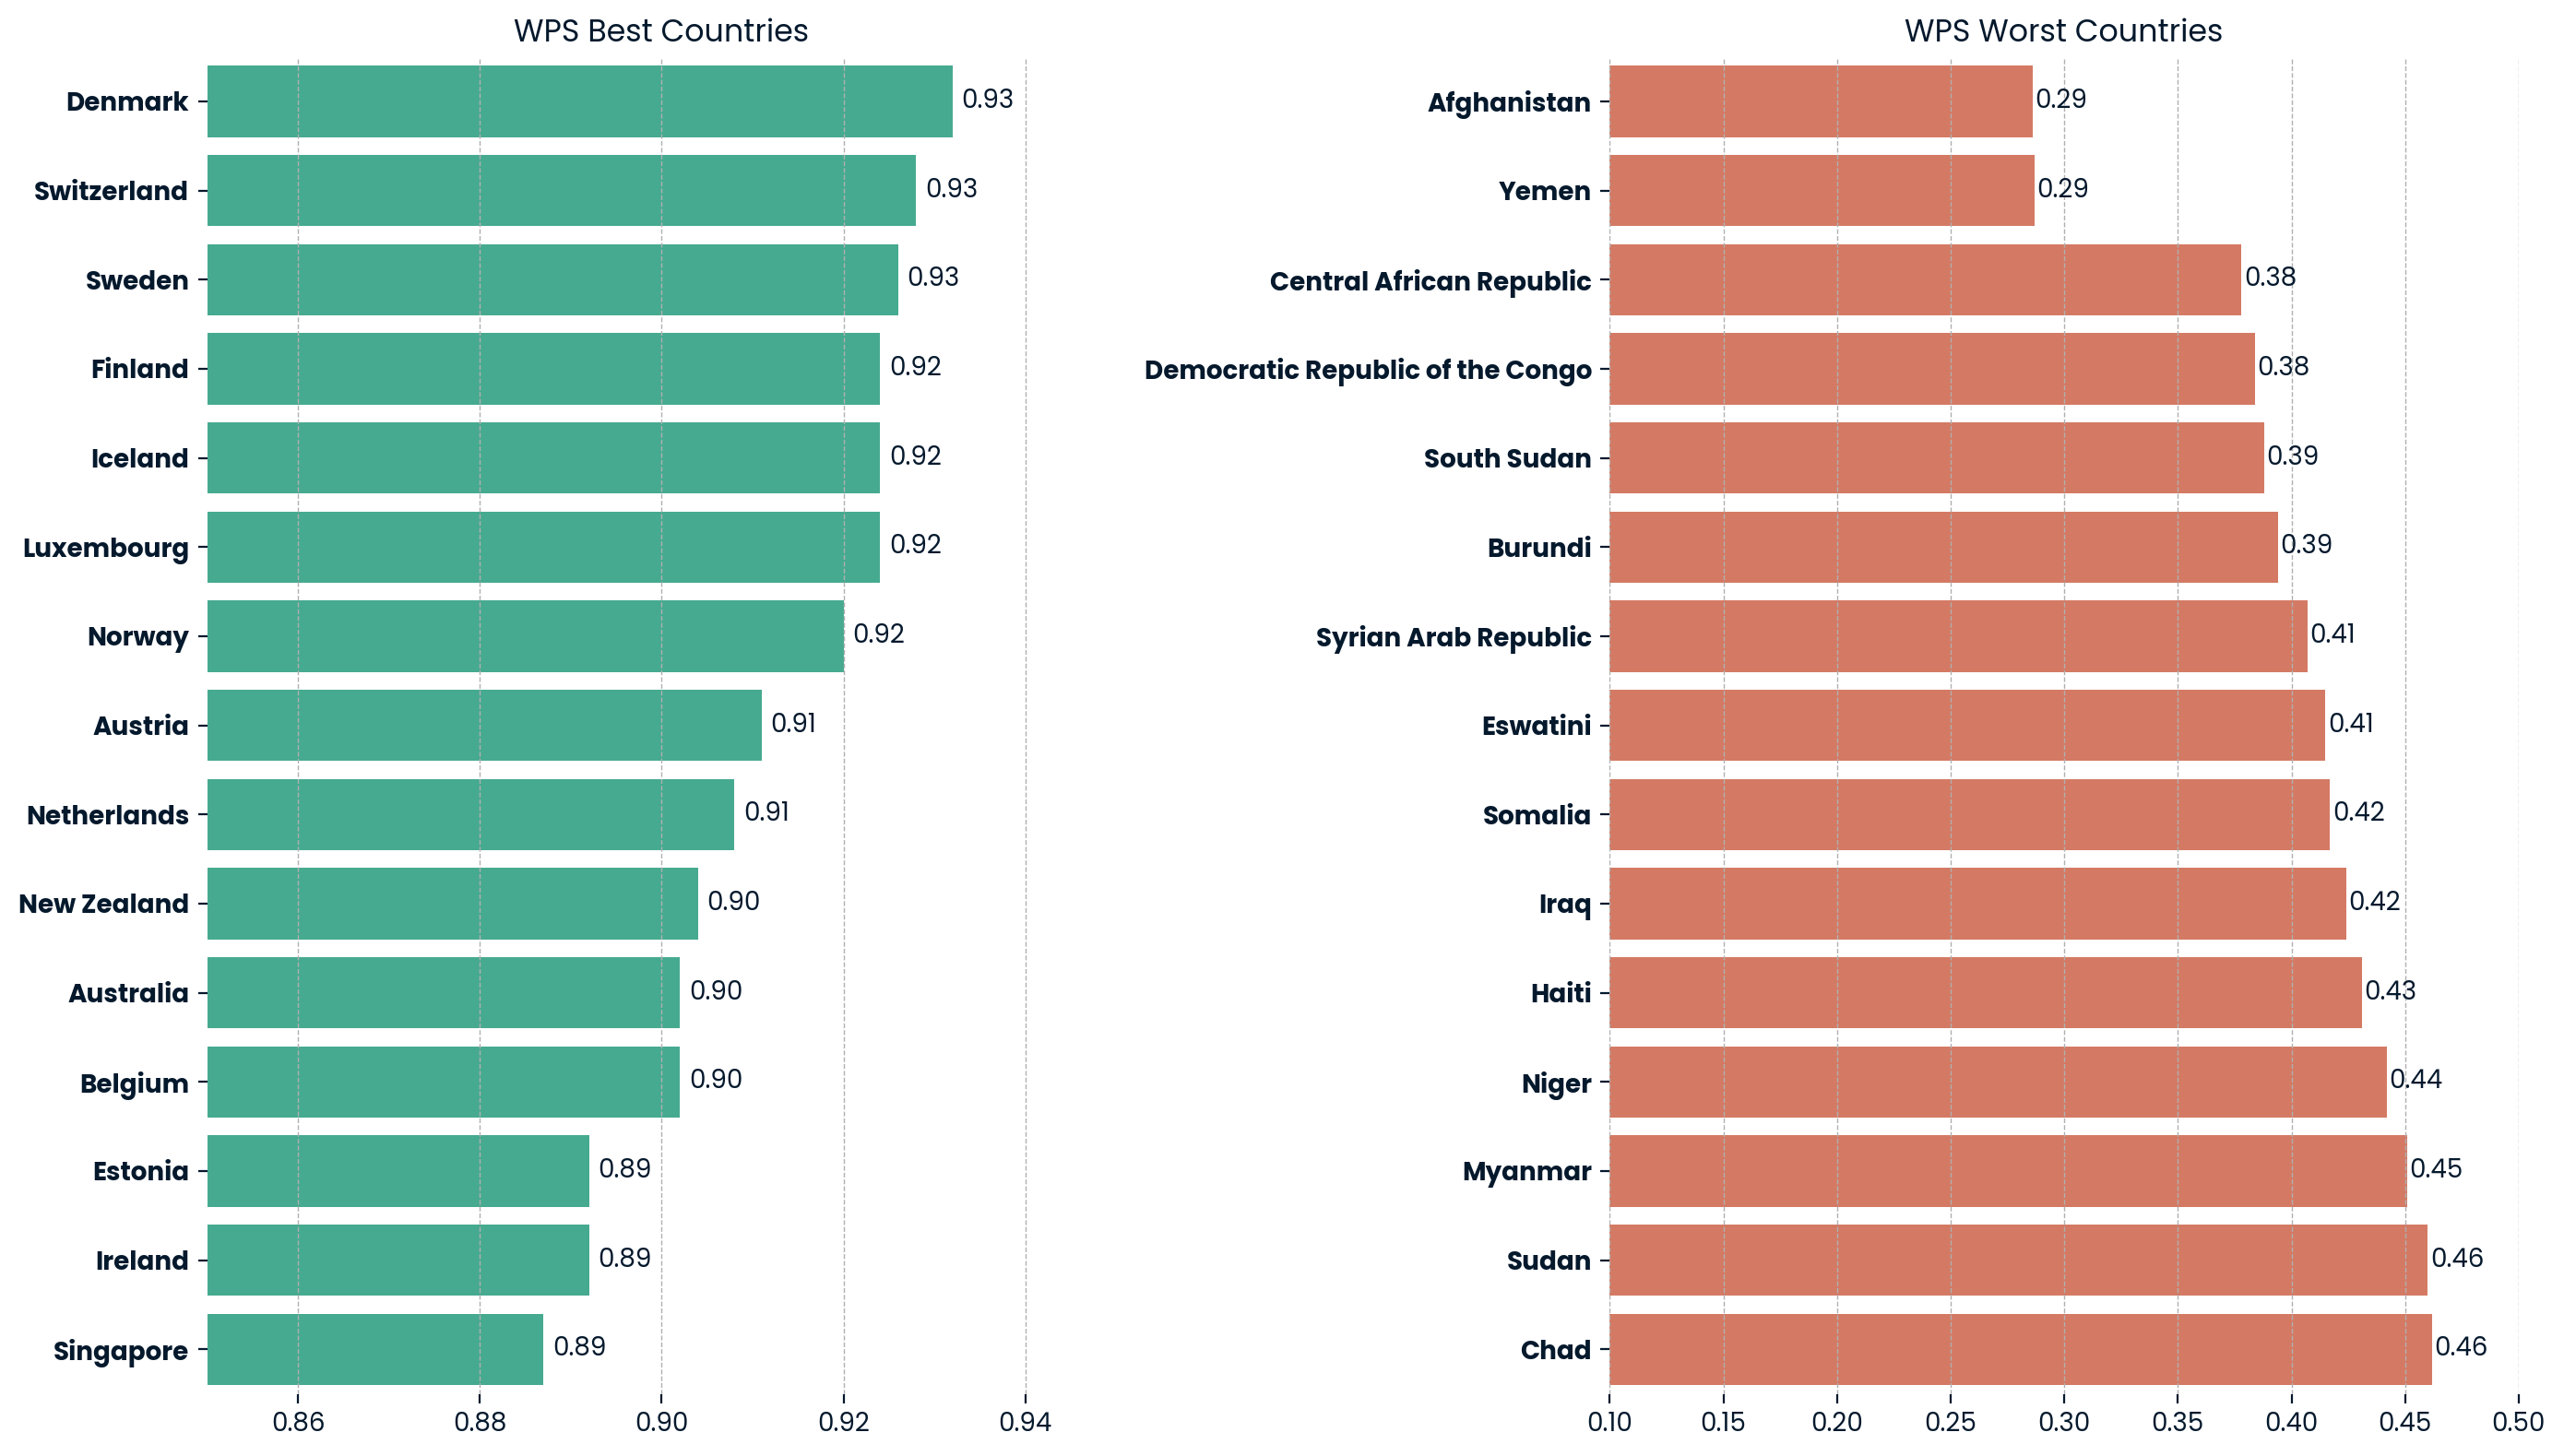

In [439]:
# Bar plot to see best and worst countries by WPS index
wps_top15 = wps.nlargest(15, "Women, Peace and Security Index (2023)")
wps_bottom15 = wps.nsmallest(15, "Women, Peace and Security Index (2023)")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))
sns.barplot(y="Country", x="Women, Peace and Security Index (2023)", data=wps_top15, ax=ax1, color="#36BA98")
ax1.set_title("WPS Best Countries")
ax1.set_xlim(.85, .95)

sns.barplot(y="Country", x="Women, Peace and Security Index (2023)", data=wps_bottom15, ax=ax2, color="#E76F51")
ax2.set_title("WPS Worst Countries")
ax2.set_xlim(.1, .5)

ax1.grid(True, which='both', axis='x', linestyle='--', linewidth=0.5)
ax2.grid(True, which='both', axis='x', linestyle='--', linewidth=0.5)

for spine in ax1.spines.values():
     spine.set_visible(False)
for spine in ax2.spines.values():
     spine.set_visible(False)
    
# Instead of for loop, you can use that
# ax1.spines['top'].set_visible(False)
# ax1.spines['right'].set_visible(False)
# ax1.spines['bottom'].set_visible(False)
# ax1.spines['left'].set_visible(False)

# ax2.spines['top'].set_visible(False)
# ax2.spines['right'].set_visible(False)
# ax2.spines['bottom'].set_visible(False)
# ax2.spines['left'].set_visible(False)

for i in range(len(wps_top15)):
    value = wps_top15["Women, Peace and Security Index (2023)"].iloc[i]
    ax1.text(value + 0.001, i, f"{value:.2f}", va='center')

for i in range(len(wps_bottom15)):
    value = wps_bottom15["Women, Peace and Security Index (2023)"].iloc[i]
    ax2.text(value + 0.001, i, f"{value:.2f}", va='center')
  
ax1.set_yticklabels(ax1.get_yticklabels(), fontweight='bold')
ax2.set_yticklabels(ax2.get_yticklabels(), fontweight='bold')   
ax1.set_xlabel('')
ax1.set_ylabel('')
ax2.set_xlabel('')
ax2.set_ylabel('')

plt.tight_layout()
plt.show()

In [440]:
# Group regions by without FS
wps["Region"] = wps["Region"].replace({
    "CEE&CA, FS": "CEE&CA",
    "EAP, FS": "EAP",
    "LAC, FS": "LAC",
    "SSA, FS": "SSA",
    "MENA, FS": "MENA",
    "SA, FS": "SA"
})
wps["Region"].value_counts()

Region
SSA       48
CEE&CA    31
DC        27
LAC       26
EAP       19
MENA      18
SA         8
Name: count, dtype: int64

In [441]:
# To see index average by regions
wps_by_region = wps.groupby("Region").mean(numeric_only=True)["Women, Peace and Security Index (2023)"].reset_index()
sorted_wps_by_region = wps_by_region.sort_values(by="Women, Peace and Security Index (2023)", ascending=False)
sorted_wps_by_region

,Region,"Women, Peace and Security Index (2023)"
1,DC,0.877000
0,CEE&CA,0.777129
2,EAP,0.686842
3,LAC,0.672423
4,MENA,0.618444
5,SA,0.595250
6,SSA,0.545938


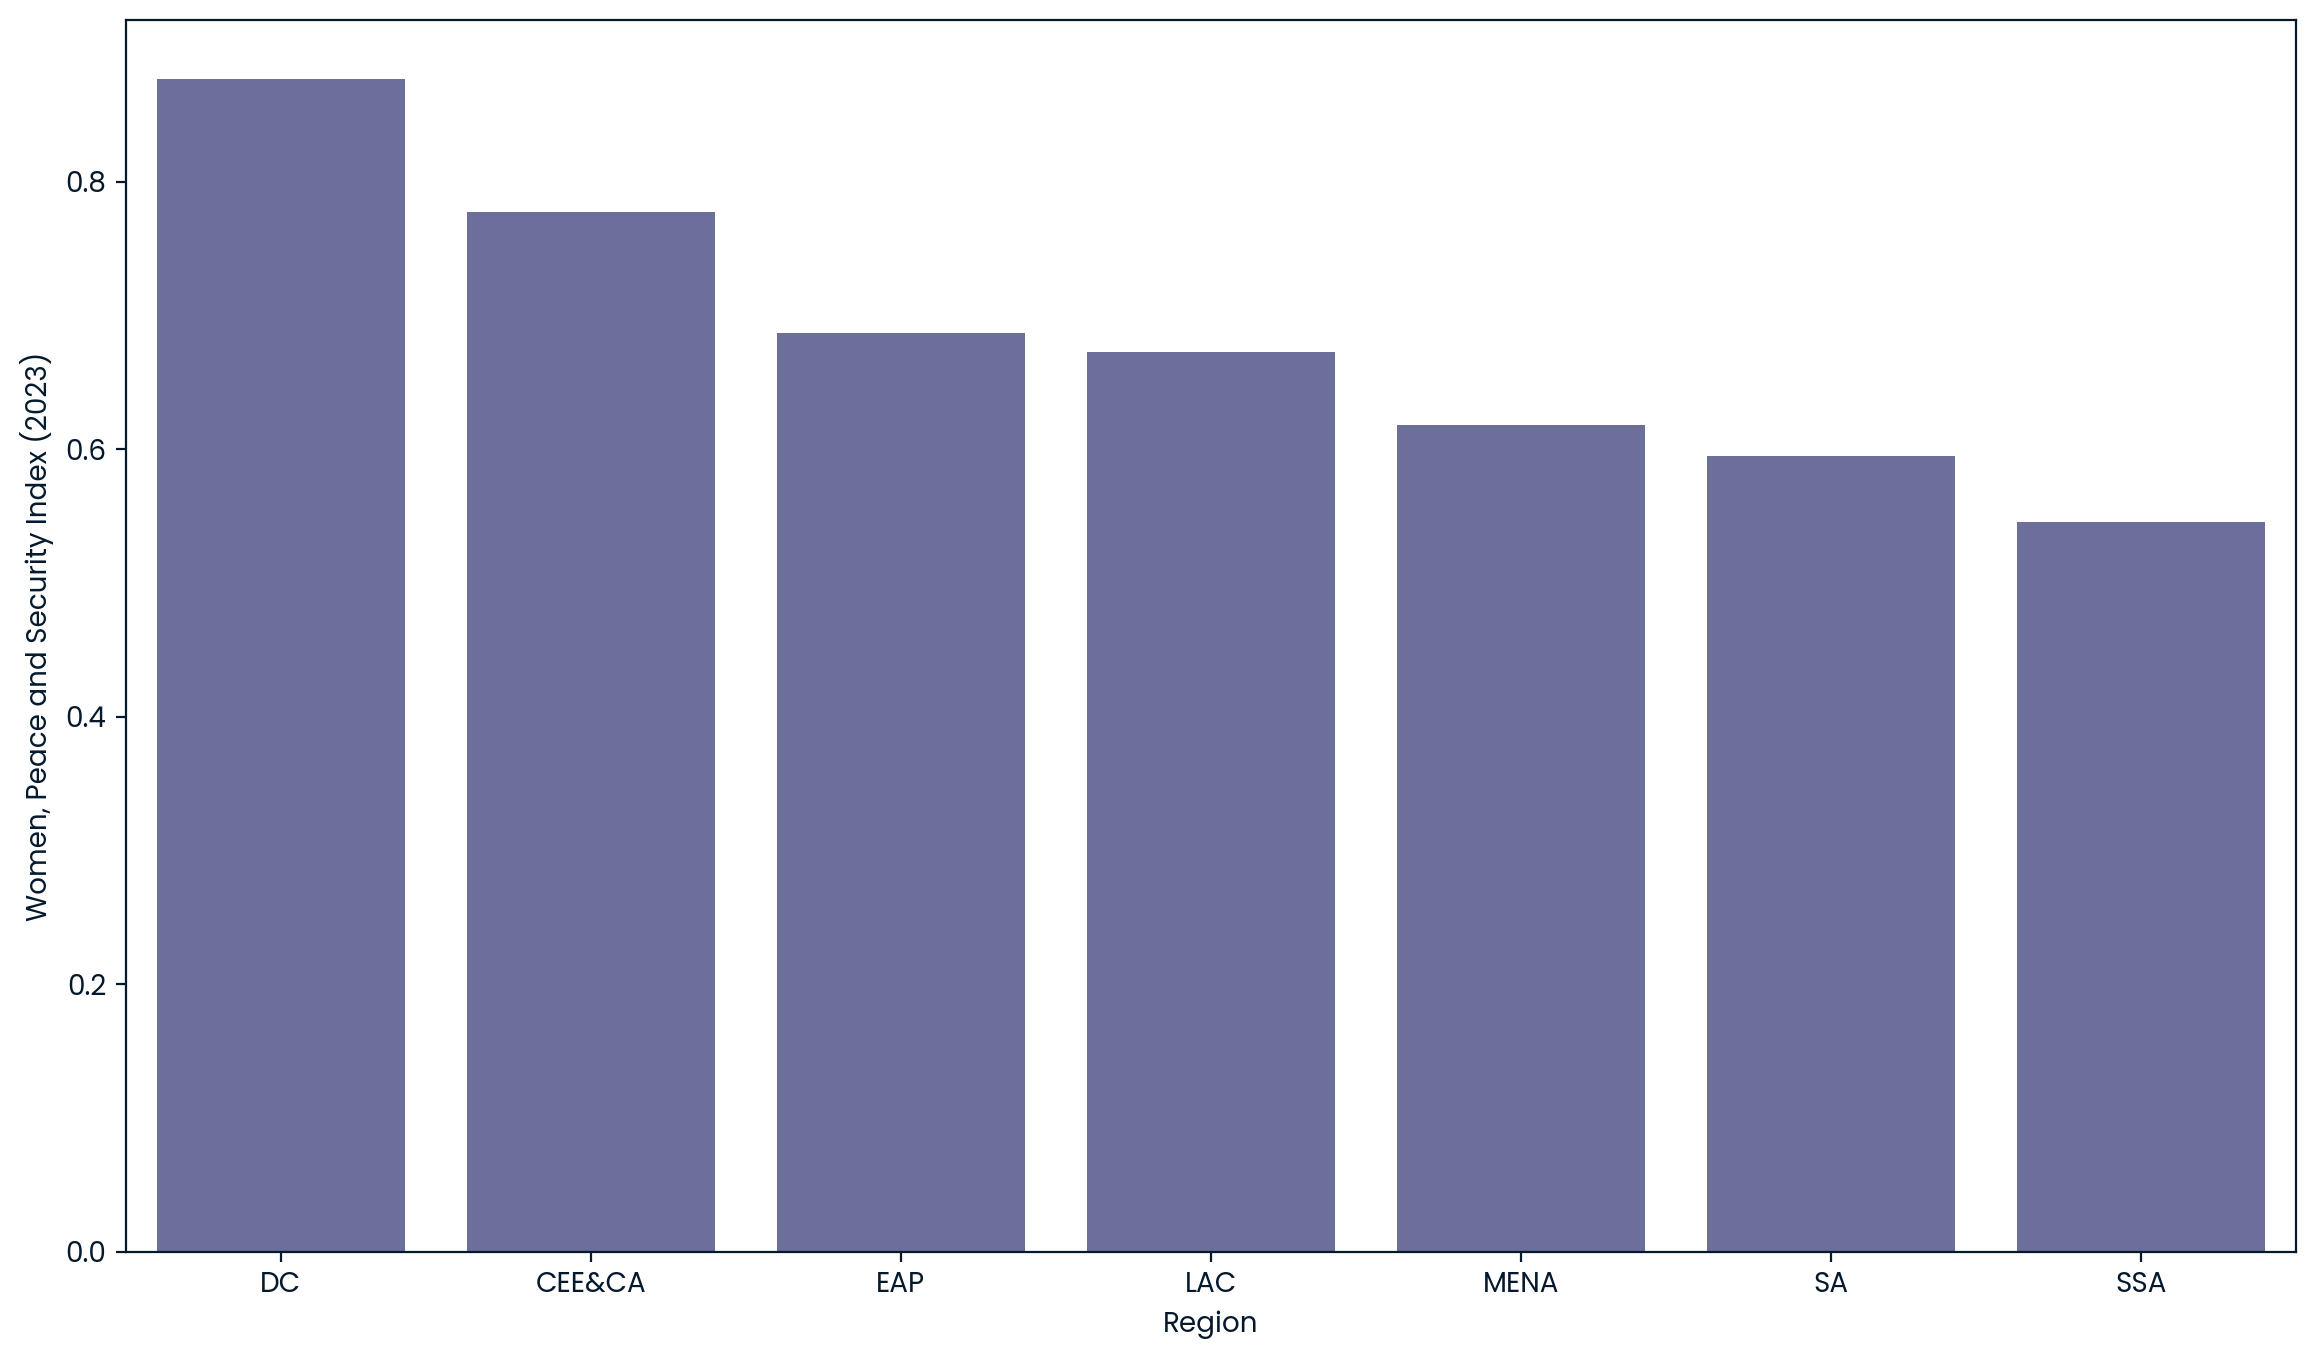

In [442]:
# Let's see that averages on the barplot. But I'm gonna make my plots by using PowerBI. Just in case,I wrote with SNS.
plt.figure(figsize=(14, 8))
sns.barplot(data=wps_by_region, x="Region", y="Women, Peace and Security Index (2023)", order=sorted_wps_by_region["Region"])
plt.show()

In [443]:
# All regions min, max and mean values as country
min_by_region = wps.groupby("Region").agg({"Women, Peace and Security Index (2023)": "min", "Country": "last"}).reset_index()
max_by_region = wps.groupby("Region").agg({"Women, Peace and Security Index (2023)": "max", "Country": "first"}).reset_index()

# Rename columns for clarity
min_by_region.rename(columns={"Women, Peace and Security Index (2023)": "Min Women, Peace and Security Index (2023)", "Country": "Min Country"}, inplace=True)
max_by_region.rename(columns={"Women, Peace and Security Index (2023)": "Max Women, Peace and Security Index (2023)", "Country": "Max Country"}, inplace=True)

min_max_by_region = pd.merge(min_by_region, max_by_region, on="Region")

min_max_by_region

,Region,"Min Women, Peace and Security Index (2023)",Min Country,"Max Women, Peace and Security Index (2023)",Max Country
0,CEE&CA,0.626,Ukraine,0.892,Estonia
1,DC,0.703,Israel,0.932,Denmark
2,EAP,0.451,Myanmar,0.818,Taiwan
3,LAC,0.431,Haiti,0.779,Barbados
4,MENA,0.287,Yemen,0.868,United Arab Emirates
5,SA,0.286,Afghanistan,0.743,Sri Lanka
6,SSA,0.378,Central African Republic,0.799,Seychelles


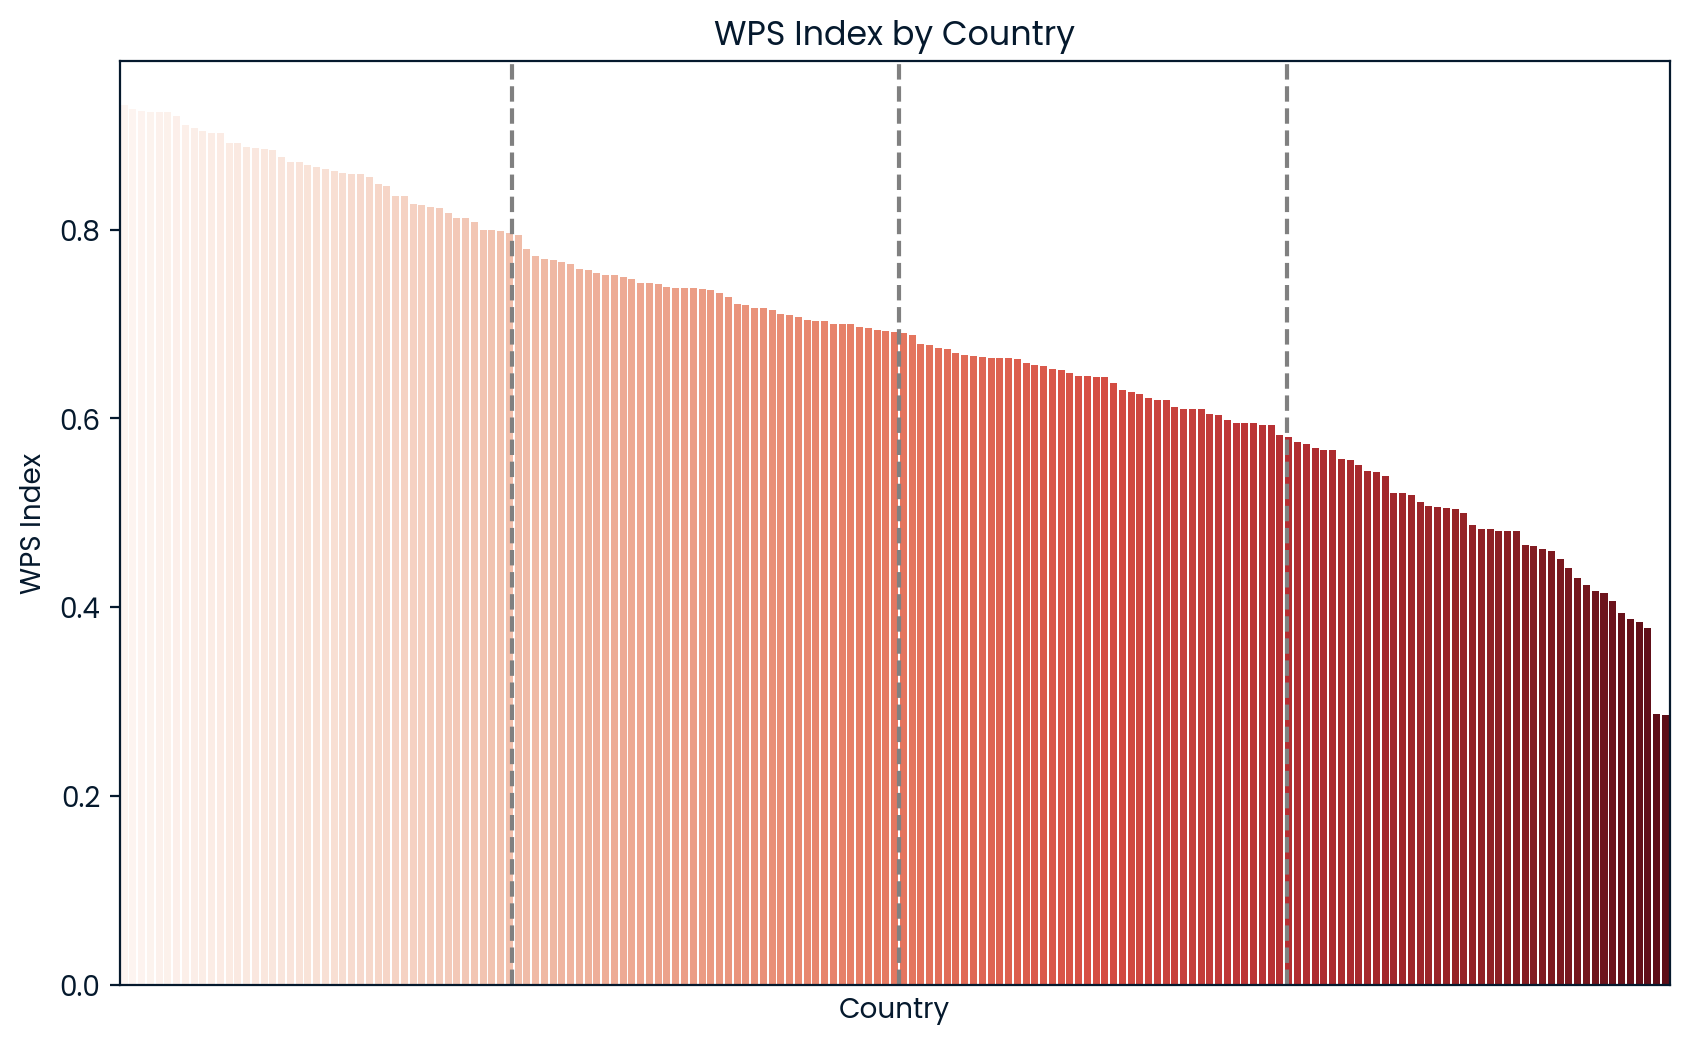

In [444]:
# Barplot to see braking points by indexes
plt.figure(figsize=(10, 6))
sns.barplot(data=wps, x="Country", y="Women, Peace and Security Index (2023)", palette="Reds")
plt.xticks([])

# Vertical grid
total_bars = len(wps)
for i in range(1, 4):
    plt.axvline(x=i * (total_bars / 4), color="gray", linestyle="--")

plt.ylabel("WPS Index")
plt.title("WPS Index by Country")

plt.show()

The mapclassify library provides various classification algorithms for identifying natural breakpoints in geographical and statistical data. Among these algorithms are Jenks Natural Breaks and JenksCaspall, both of which aim to group data effectively based on its distribution.

Difference Between Jenks Natural Breaks and JenksCaspall:
1. Jenks Natural Breaks:
Definition: Jenks Natural Breaks is a method designed to minimize variance within groups while maximizing variance between groups. In other words, values within a group are as similar as possible, while the differences between groups are maximized.
Use Case: This method is commonly used to find natural clusters in data, especially in geographical or demographic datasets. It works well when there are clear breakpoints in the data distribution.
2. JenksCaspall:
Definition: JenksCaspall is a variant of the natural breaks classification, utilizing a more complex algorithm for optimizing breakpoints. It has other variants like JenksCaspallSample, focusing on optimizing the initial breakpoints.
Use Case: JenksCaspall offers a more advanced optimization and can perform better in cases with limited data or densely clustered data points.

In Summary:
Jenks Natural Breaks is a more commonly used method optimized for detecting natural breakpoints in data distributions.
JenksCaspall works similarly but employs a more sophisticated optimization process. It’s beneficial for scenarios requiring finer distinctions in classifying data, especially when the data structure is more complex.
If your dataset has clear breakpoints, Jenks Natural Breaks is usually sufficient. However, for more complex datasets, methods like JenksCaspall can yield better results. You can try both methods to see which performs best for your specific dataset.

In [445]:
# To find braking points with jenks natural breaks
from mapclassify import JenksCaspall

breaks = JenksCaspall(wps["Women, Peace and Security Index (2023)"], k=7)
wps["Category"] = breaks.yb
wps["Category"] = pd.cut(breaks.yb, bins=7, labels=["Bottom", "Low", "Medium-Low", "Medium", "Medium-High", "High", "Top"])
wps["Category"].value_counts()

Category
Bottom         29
Medium-Low     29
Top            29
Medium         25
Low            24
Medium-High    24
High           17
Name: count, dtype: int64

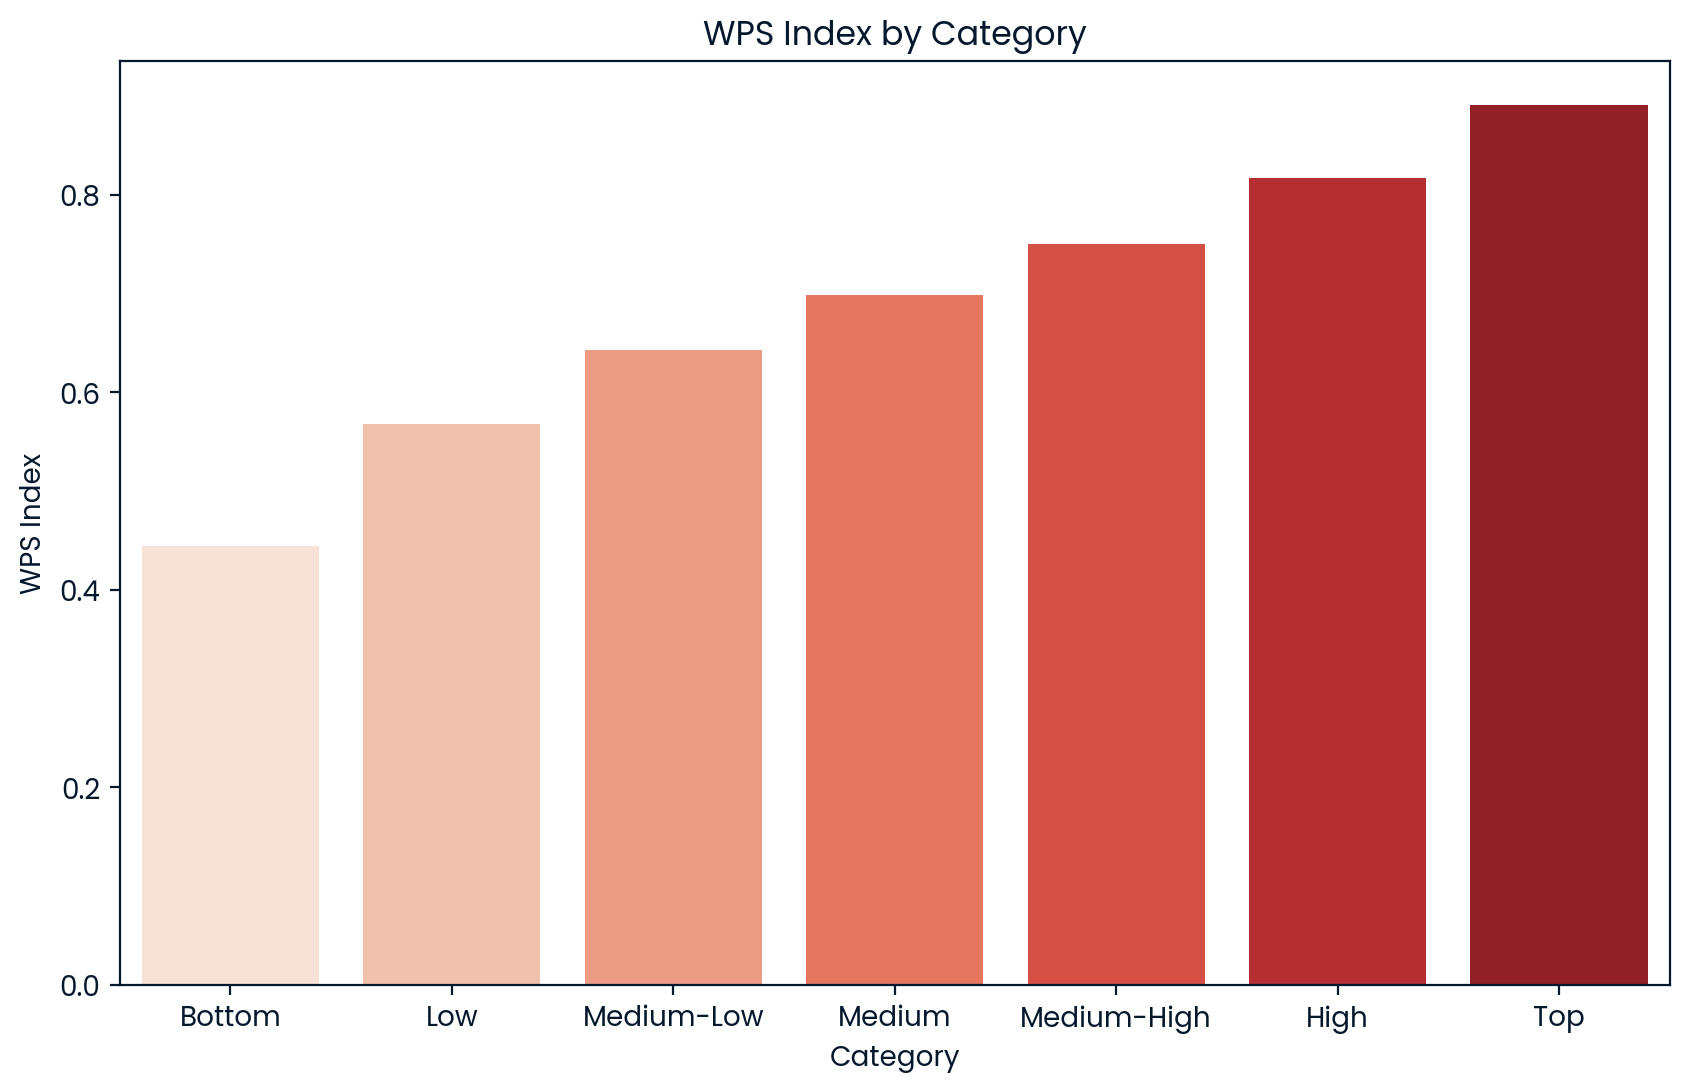

   Country Category
79  Israel   Medium
    Country Category
12  Estonia      Top
   Country Category
37  Taiwan     High
     Country     Category
46  Barbados  Medium-High
                 Country Category
21  United Arab Emirates      Top
      Country     Category
60  Sri Lanka  Medium-High
       Country Category
42  Seychelles     High


In [446]:
# Bar plot to visualize the distribution of categories
plt.figure(figsize=(10, 6))
sns.barplot(data=wps, x="Category", y="Women, Peace and Security Index (2023)", palette="Reds", ci=None)
plt.ylabel("WPS Index")
plt.title("WPS Index by Category")
plt.show()

# Checked the categories of specific countries
print(wps.loc[wps["Country"] == "Israel", ["Country", "Category"]])
print(wps.loc[wps["Country"] == "Estonia", ["Country", "Category"]])
print(wps.loc[wps["Country"] == "Taiwan", ["Country", "Category"]])
print(wps.loc[wps["Country"] == "Barbados", ["Country", "Category"]])
print(wps.loc[wps["Country"] == "United Arab Emirates", ["Country", "Category"]])
print(wps.loc[wps["Country"] == "Sri Lanka", ["Country", "Category"]])
print(wps.loc[wps["Country"] == "Seychelles", ["Country", "Category"]])

In [447]:
# Imported TasteAtlas data
taste_atlas = pd.read_csv("Datas/100_country.csv")
print(taste_atlas.info())
print("---------------")
print(taste_atlas.isnull().any())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rank     100 non-null    int64  
 1   Country  100 non-null    object 
 2   Rating   100 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.5+ KB
None
---------------
Rank       False
Country    False
Rating     False
dtype: bool


In [448]:
taste_atlas

,Rank,Country,Rating
0,1,Italy,4.65
1,2,Japan,4.65
2,3,Greece,4.64
3,4,Portugal,4.61
4,5,China,4.59
...,...,...,...
95,96,Northern Ireland,3.89
96,97,The Bahamas,3.89
97,98,Dominican Republic,3.88
98,99,Wales,3.88


In [449]:
breaks_food = JenksCaspall(taste_atlas["Rating"], k=7)
taste_atlas["Category"] = breaks_food.yb
taste_atlas["Category"] = pd.cut(breaks_food.yb, bins=7, labels=["Bottom", "Low", "Medium-Low", "Medium", "Medium-High", "High", "Top"])
taste_atlas["Category"].value_counts()

Category
Bottom         19
Low            17
Medium-High    15
Medium         14
High           13
Top            12
Medium-Low     10
Name: count, dtype: int64

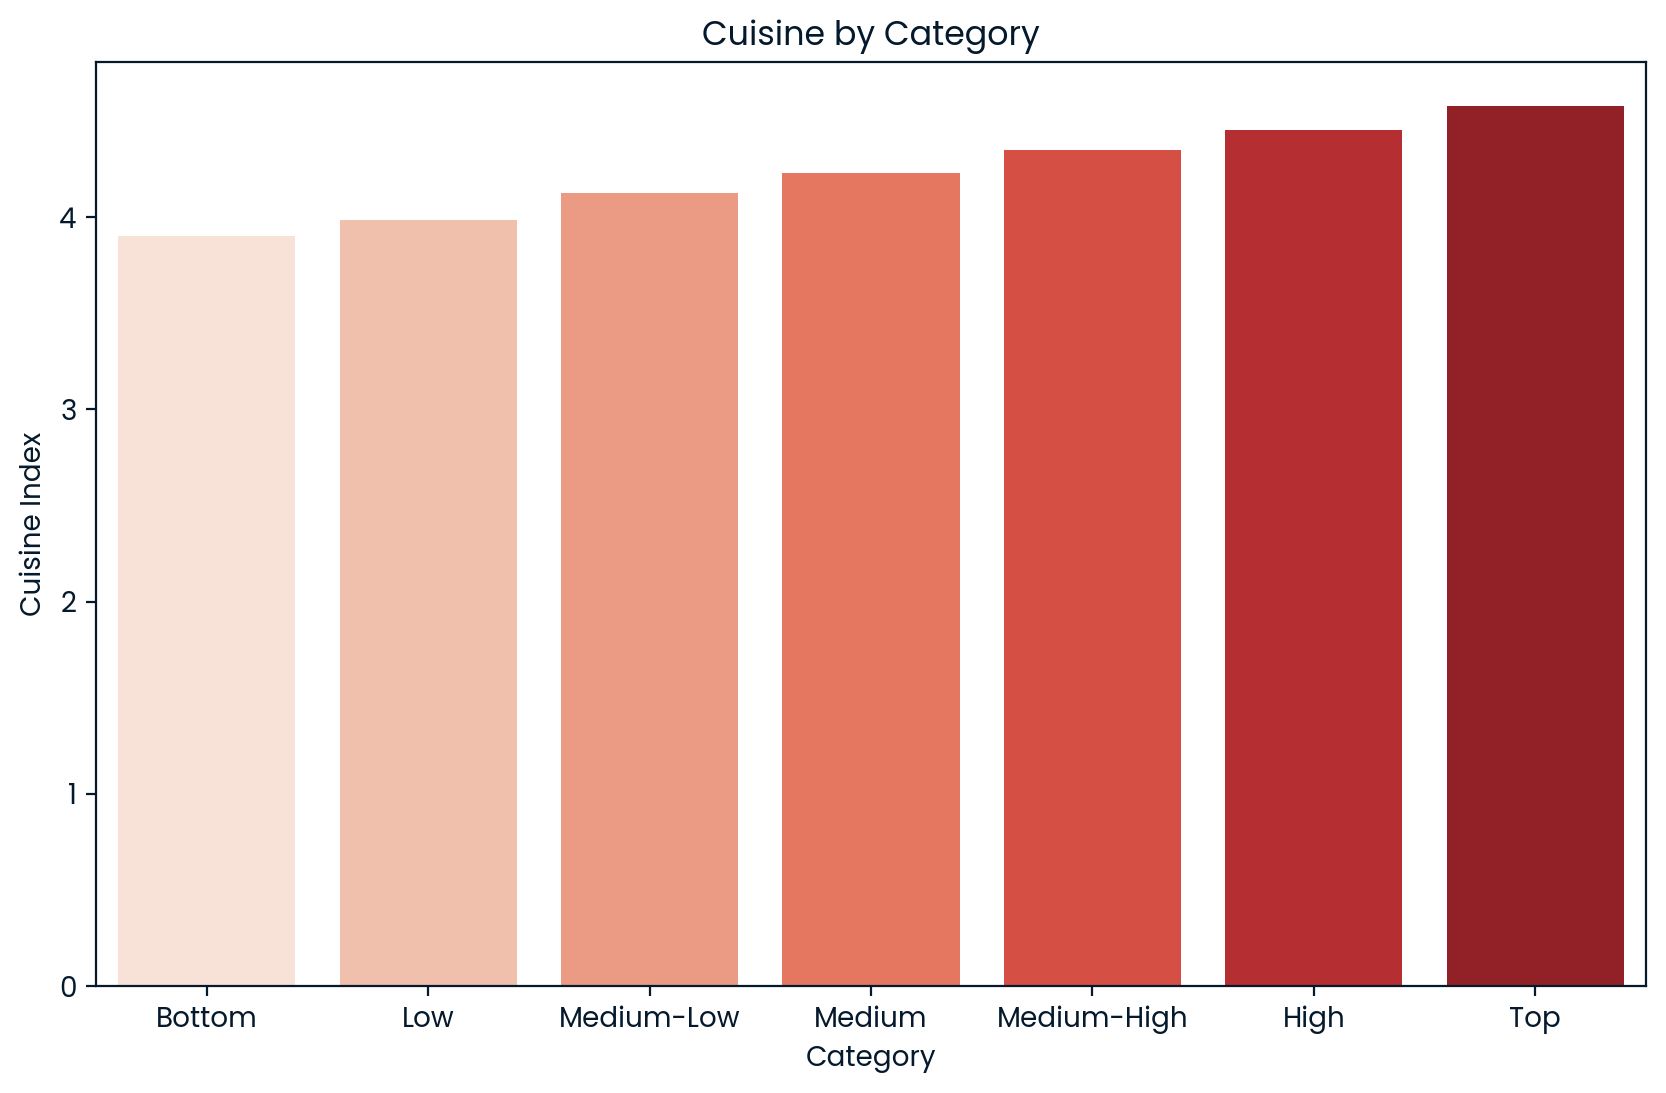

In [450]:
plt.figure(figsize=(10, 6))
sns.barplot(data=taste_atlas, x="Category", y="Rating", palette="Reds", ci=None)
plt.ylabel("Cuisine Index")
plt.title("Cuisine by Category")
plt.show()

In [451]:
# First gonna select columns and then check correlation
wps_selected = wps[["2023 Rank", "Country", "Women, Peace and Security Index (2023)", "Category"]]
taste_atlas_selected = taste_atlas[["Rank", "Country", "Rating", "Category"]]
merged_both = pd.merge(wps_selected, taste_atlas_selected, on="Country")
merged_both.shape

# Some country names are writen different. So couse of that, we have 86 row, not 100. Need to find which ones are different and fix it.

(86, 7)

In [452]:
# Different country names
wps_country = set(wps["Country"].unique())
tasteatlas_country = set(taste_atlas["Country"].unique())

# Find the countries that are different
difference = tasteatlas_country - wps_country
difference

{'Cuba',
 'Czech Republic',
 'England',
 'Laos',
 'Northern Ireland',
 'Palestine',
 'Russia',
 'Scotland',
 'Syria',
 'The Bahamas',
 'Turkey',
 'USA',
 'Vietnam',
 'Wales'}

In [453]:
# I checked how these countries are written in the WPS dataset
# Cuba doesn't have a WPS index
wps["Country"] = wps["Country"].str.strip() # Palestine needed to strip.
wps.loc[wps["Country"] == "Czechia", "Country"] = "Czech Republic"
wps.loc[wps["Country"] == "United Kingdom", "Country"] = "England"
wps.loc[wps["Country"] == "Lao PDR", "Country"] = "Laos"
# Ireland fixed under
wps.loc[wps["Country"] == "Palestine", "Country"] = "Palestine"
wps.loc[wps["Country"] == "Russian Federation", "Country"] = "Russia"
# Scotland is included in the United Kingdom in the WPS dataset, so I can't add it.
wps.loc[wps["Country"] == "Syrian Arab Republic", "Country"] = "Syria"
# Bahamas doesn't have a WPS index
wps.loc[wps["Country"] == "Türkiye", "Country"] = "Turkey"
wps.loc[wps["Country"] == "United States", "Country"] = "USA"
wps.loc[wps["Country"] == "Viet Nam", "Country"] = "Vietnam"
# Wales is also included in the United Kingdom in the WPS dataset.
wps["Country"] = wps["Country"].str.strip() # Palestine needed to strip.

In [454]:
# Test row number again
wps_selected = wps[["2023 Rank", "Country", "Women, Peace and Security Index (2023)", "Category"]]
taste_atlas_selected = taste_atlas[["Rank", "Country", "Rating", "Category"]]
merged_both = pd.merge(wps_selected, taste_atlas_selected, on="Country")
merged_both.shape

(95, 7)

In [455]:
wps_country = set(wps["Country"].unique())
tasteatlas_country = set(taste_atlas["Country"].unique())

# Find the countries that are different
difference = tasteatlas_country - wps_country
difference

{'Cuba', 'Northern Ireland', 'Scotland', 'The Bahamas', 'Wales'}

In [456]:
# Merged both again
wps_selected_7 = wps[["2023 Rank", "Country", "Women, Peace and Security Index (2023)", "Category"]]
taste_atlas_selected_7 = taste_atlas[["Rank", "Country", "Rating", "Category"]]
merged_both_7 = pd.merge(wps_selected_7, taste_atlas_selected_7, on="Country", suffixes=("_wps", "_taste_atlas"))
merged_both_7.shape

# {'Cuba', 'Northern Ireland', 'Scotland', 'The Bahamas', 'Wales'} are not in this merged table. I already explained most of them, but regarding Northern Ireland, I believe it might be better to leave it as is. Of course, Northern Ireland is more closely associated with England. Because of that, I believe the other side of Ireland's values must be more culturally comparable to the Northern side. I would merge both Ireland and take the mean of the ratings, but I thought leaving it like this would be clearer.

(95, 7)

In [457]:
from scipy.stats import chi2_contingency
import pandas as pd

# Corrected code to create a contingency table
contingency_table_7 = pd.crosstab(merged_both_7["Category_wps"], merged_both_7["Category_taste_atlas"])

chi2_7, p_7, dof_7, expected_7 = chi2_contingency(contingency_table_7)

print("Chi2 Value:", chi2_7)
print("---------------")
print("p-Value:", p)
print("---------------")
print("Expected output:\n", expected_7)
print("---------------")
print("\nContingency Table:\n", contingency_table_7)

Chi2 Value: 44.50256212137222
---------------
p-Value: 0.15631075874650177
---------------
Expected output:
 [[1.01052632 1.01052632 0.63157895 0.82105263 0.94736842 0.82105263
  0.75789474]
 [1.17894737 1.17894737 0.73684211 0.95789474 1.10526316 0.95789474
  0.88421053]
 [2.35789474 2.35789474 1.47368421 1.91578947 2.21052632 1.91578947
  1.76842105]
 [2.52631579 2.52631579 1.57894737 2.05263158 2.36842105 2.05263158
  1.89473684]
 [2.69473684 2.69473684 1.68421053 2.18947368 2.52631579 2.18947368
  2.02105263]
 [2.18947368 2.18947368 1.36842105 1.77894737 2.05263158 1.77894737
  1.64210526]
 [4.04210526 4.04210526 2.52631579 3.28421053 3.78947368 3.28421053
  3.03157895]]
---------------

Contingency Table:
 Category_taste_atlas  Bottom  Low  Medium-Low  Medium  Medium-High  High  Top
Category_wps                                                                 
Bottom                     2    1           2       1            0     0    0
Low                        1    1           0

In [458]:
# I'm gonna split countries to 3 and 4 and do the same thing like before
wps.drop("Category", axis=1, inplace=True)
taste_atlas.drop("Category", axis=1, inplace=True)

In [459]:
breaks_food_wps_4 = JenksCaspall(wps["Women, Peace and Security Index (2023)"], k=4)
wps["Category"] = breaks_food_wps_4.yb
wps["Category"] = pd.cut(breaks_food_wps_4.yb, bins=4, labels=["Low", "Medium", "High", "Top"])

breaks_food_taste_4 = JenksCaspall(taste_atlas["Rating"], k=4)
taste_atlas["Category"] = breaks_food_taste_4.yb
taste_atlas["Category"] = pd.cut(breaks_food_taste_4.yb, bins=4, labels=["Low", "Medium", "High", "Top"])

wps_selected_4 = wps[["2023 Rank", "Country", "Women, Peace and Security Index (2023)", "Category"]]
taste_atlas_selected_4 = taste_atlas[["Rank", "Country", "Rating", "Category"]]
merged_both_4 = pd.merge(wps_selected_4, taste_atlas_selected_4, on="Country", suffixes=("_wps", "_taste_atlas"))
merged_both_4.shape

(95, 7)

In [460]:
# Corrected code to create a contingency table for splited 4
contingency_table_4 = pd.crosstab(merged_both_4["Category_wps"], merged_both_4["Category_taste_atlas"])

chi2_4, p_4, dof_4, expected_4 = chi2_contingency(contingency_table_4)

print("Chi2 Value:", chi2_4)
print("---------------")
print("p-Value:", p_4)
print("---------------")
print("Expected output:\n", expected_4)
print("---------------")
print("\nContingency Table:\n", contingency_table_4)

Chi2 Value: 15.102334288820833
---------------
p-Value: 0.088163111252335
---------------
Expected output:
 [[ 2.69473684  1.76842105  1.68421053  1.85263158]
 [ 7.41052632  4.86315789  4.63157895  5.09473684]
 [10.44210526  6.85263158  6.52631579  7.17894737]
 [11.45263158  7.51578947  7.15789474  7.87368421]]
---------------

Contingency Table:
 Category_taste_atlas  Low  Medium  High  Top
Category_wps                                
Low                     4       3     0    1
Medium                 10       4     5    3
High                   14       5     5    7
Top                     4       9    10   11


In [461]:
# Same correlation for 3 categories
wps.drop("Category", axis=1, inplace=True)
taste_atlas.drop("Category", axis=1, inplace=True)

In [462]:
breaks_food_wps_3 = JenksCaspall(wps["Women, Peace and Security Index (2023)"], k=3)
wps["Category"] = breaks_food_wps_3.yb
wps["Category"] = pd.cut(breaks_food_wps_3.yb, bins=3, labels=["Low", "Medium", "High"])

breaks_food_taste_3 = JenksCaspall(taste_atlas["Rating"], k=3)
taste_atlas["Category"] = breaks_food_taste_3.yb
taste_atlas["Category"] = pd.cut(breaks_food_taste_3.yb, bins=3, labels=["Low", "Medium", "High"])

wps_selected_3 = wps[["2023 Rank", "Country", "Women, Peace and Security Index (2023)", "Category"]]
taste_atlas_selected_3 = taste_atlas[["Rank", "Country", "Rating", "Category"]]
merged_both_3 = pd.merge(wps_selected_3, taste_atlas_selected_3, on="Country", suffixes=("_wps", "_taste_atlas"))
merged_both_3.shape

(95, 7)

In [463]:
# Corrected code to create a contingency table for splited 3
contingency_table_3 = pd.crosstab(merged_both_3["Category_wps"], merged_both_3["Category_taste_atlas"])

chi2_3, p_3, dof_3, expected_3 = chi2_contingency(contingency_table_3)

print("Chi2 Value:", chi2_3)
print("---------------")
print("p-Value:", p_3)
print("---------------")
print("Expected output:\n", expected_3)
print("---------------")
print("\nContingency Table:\n", contingency_table_3)

Chi2 Value: 8.68609396468634
---------------
p-Value: 0.06944286879755149
---------------
Expected output:
 [[ 4.51578947  4.24210526  4.24210526]
 [15.28421053 14.35789474 14.35789474]
 [13.2        12.4        12.4       ]]
---------------

Contingency Table:
 Category_taste_atlas  Low  Medium  High
Category_wps                           
Low                     5       3     5
Medium                 21      11    12
High                    7      17    14


I know I could have handled all the categories in an easier way initially, but this idea came to me after I calculated the correlation for 7 splits. So again, I know that dropping columns repeatedly is not an efficient method, but since this is the end of the project and there isn't much left to do, I went ahead with it.